# Part 1: Data Exploration and Preparation

# Task: Data Exploration

In [1]:
### Load Important Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import gensim.downloader as gensim_api
from textblob import TextBlob

In [2]:
# Load the dataset
df = pd.read_csv('twitter_disaster.csv')

In [3]:
# First few rows of dataset
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# Dataset Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
# Remove unnecessary colums
df_new = df.drop(columns=['id','keyword','location'])
df_new.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# check missing values
df_new.isnull().sum()

text      0
target    0
dtype: int64

In [7]:
# check duplicates
df_new.duplicated().sum()

92

In [8]:
df_new.shape

(7613, 2)

In [9]:
# Remove duplicates
df_new = df_new.drop_duplicates(keep='first')

In [10]:
df_new.duplicated().sum()

0

In [11]:
df_new.shape

(7521, 2)

#### Task: Data Exploration

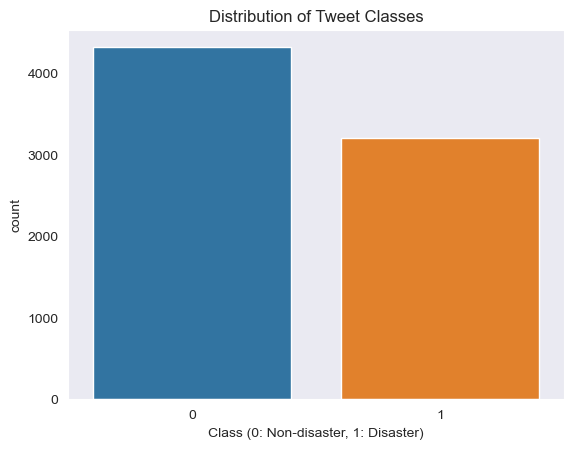

In [12]:
# Distribution of target classes
sns.set_style('dark')
sns.countplot(x='target',data=df_new)
plt.title('Distribution of Tweet Classes')
plt.xlabel('Class (0: Non-disaster, 1: Disaster)')
plt.show()

Class 0 (Non-disaster): The blue bar represents non-disaster-related tweets. It has a count just above 4000. These tweets are not related to any disasters.
Class 1 (Disaster): The orange bar represents disaster-related tweets. It reaches a count just below 3000. These tweets are associated with actual disasters.

In [13]:
df_new['target'].value_counts()

target
0    4315
1    3206
Name: count, dtype: int64

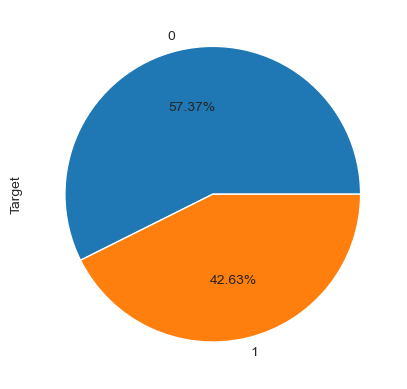

In [14]:
# Print percentage distribution
df_new['target'].value_counts().plot.pie(autopct='%0.2f%%')
plt.ylabel('Target')
plt.show()

The blue segment labeled “0” represents approximately 57.37%.
The orange segment labeled “1” represents approximately 42.63%.
This pie chart depict a binary outcome distribution, where “0” likely indicates absence or a negative outcome, while “1” represents presence or a positive outcome. The category associated with “0” has a higher percentage in this distribution.

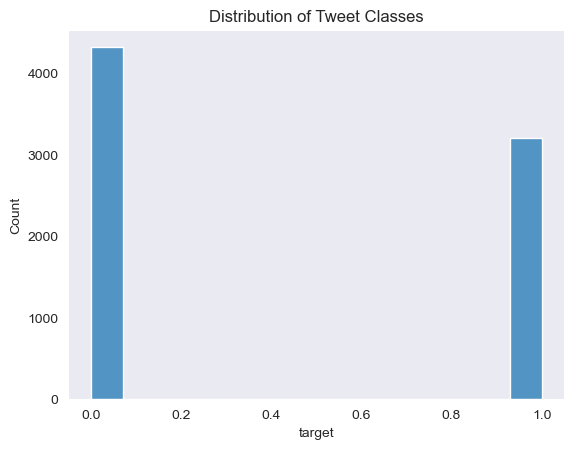

In [15]:
sns.set_style('dark')
sns.histplot(x='target',data=df_new)
plt.title('Distribution of Tweet Classes')
plt.show()

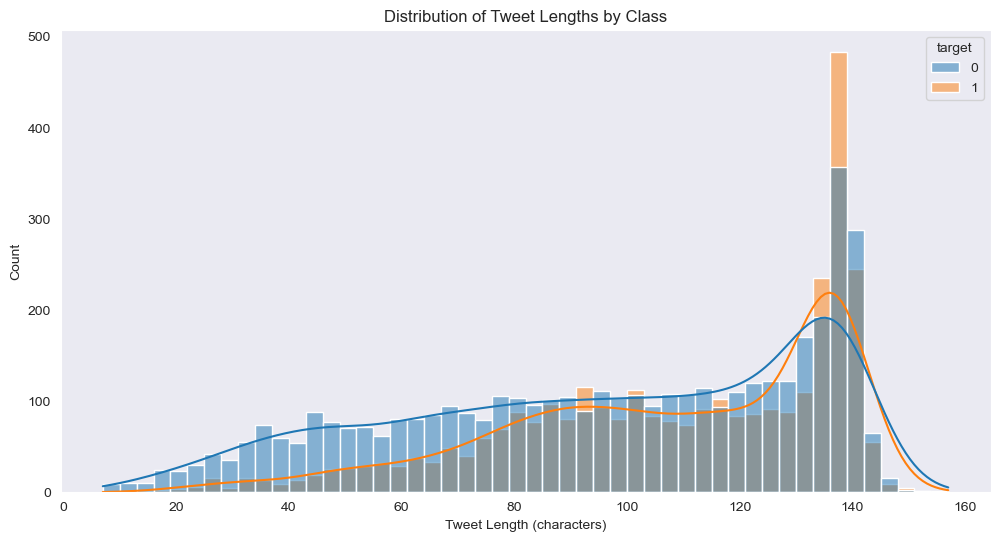

In [16]:
# Gemerate new feature to Analyse text's length
df_new['text_length'] = df_new['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=df_new, x='text_length', hue='target', bins=50,kde=True,)
plt.title('Distribution of Tweet Lengths by Class')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Count')
plt.show()

Description: The chart combines a histogram and a line graph to show the distribution of tweet lengths for two classes (represented by different colors):
Orange (Class 0): This class has a peak around 20 characters, suggesting shorter tweets.
Blue (Class 1): This class exhibits a significant spike near 140 characters, indicating a large number of tweets close to Twitter’s maximum character limit.


In [17]:
df_new.head()

,text,target,text_length
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


In [18]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
# Generate new feture to Analyse no. of words
df_new['num_words'] = df_new['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df_new.head()

,text,target,text_length,num_words
0,Our Deeds are the Reason of this #earthquake M...,1,69,14
1,Forest fire near La Ronge Sask. Canada,1,38,8
2,All residents asked to 'shelter in place' are ...,1,133,24
3,"13,000 people receive #wildfires evacuation or...",1,65,9
4,Just got sent this photo from Ruby #Alaska as ...,1,88,18


In [21]:
# Generate new feture to Analyse number of sentences 
df_new['num_sentences'] = df_new['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df_new.head()

,text,target,text_length,num_words,num_sentences
0,Our Deeds are the Reason of this #earthquake M...,1,69,14,1
1,Forest fire near La Ronge Sask. Canada,1,38,8,2
2,All residents asked to 'shelter in place' are ...,1,133,24,2
3,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1


In [23]:
# Describe additional features to analyse
df_new[['text_length','num_words','num_sentences']].describe()

,text_length,num_words,num_sentences
count,7521.000000,7521.000000,7521.000000
mean,100.880734,18.894961,1.560032
std,33.812307,6.884331,0.968874
min,7.000000,1.000000,1.000000
25%,77.000000,14.000000,1.000000
50%,107.000000,19.000000,1.000000
75%,133.000000,24.000000,2.000000
max,157.000000,72.000000,22.000000


In [24]:
# Analyse data saperately for disaster and non-disaster tweets
# Non-disaster
df_new[df_new['target'] == 0][['text_length','num_words','num_sentences']].describe()

,text_length,num_words,num_sentences
count,4315.000000,4315.000000,4315.000000
mean,95.603708,18.634531,1.666049
std,35.924812,7.446185,1.067254
min,7.000000,1.000000,1.000000
25%,68.000000,13.000000,1.000000
50%,101.000000,19.000000,1.000000
75%,130.000000,24.000000,2.000000
max,157.000000,72.000000,22.000000


In [25]:
# Disaster
df_new[df_new['target'] == 1][['text_length','num_words','num_sentences']].describe()

,text_length,num_words,num_sentences
count,3206.000000,3206.000000,3206.000000
mean,107.983157,19.245477,1.417342
std,29.281074,6.029667,0.796168
min,14.000000,2.000000,1.000000
25%,88.000000,15.000000,1.000000
50%,114.000000,20.000000,1.000000
75%,135.000000,24.000000,2.000000
max,151.000000,39.000000,8.000000


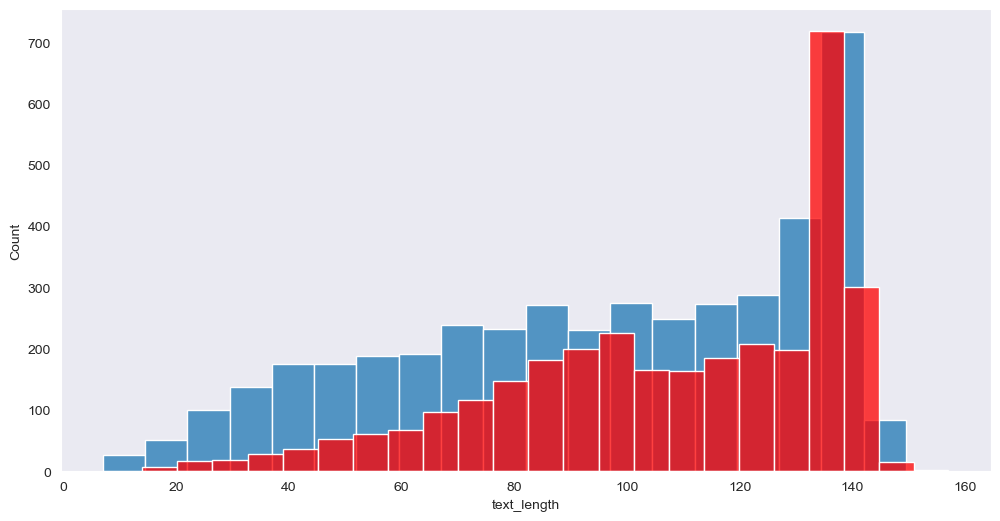

In [26]:
# plot histogram to analysis text length
plt.figure(figsize=(12,6))
sns.histplot(df_new[df_new['target'] == 0]['text_length'])
sns.histplot(df_new[df_new['target'] == 1]['text_length'],color='red')
plt.show()

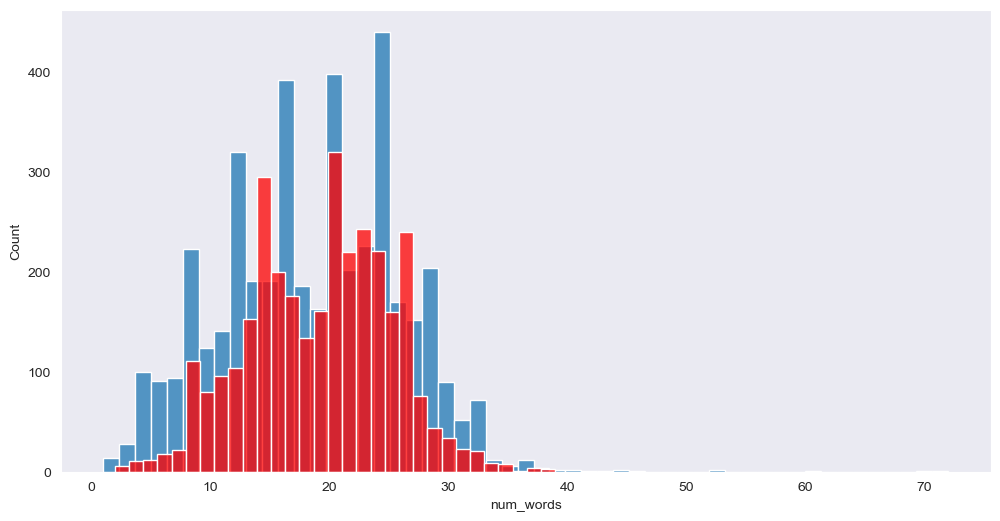

In [27]:
# plot histogram to analysis number of words
plt.figure(figsize=(12,6))
sns.histplot(df_new[df_new['target'] == 0]['num_words'])
sns.histplot(df_new[df_new['target'] == 1]['num_words'],color='red')
plt.show()

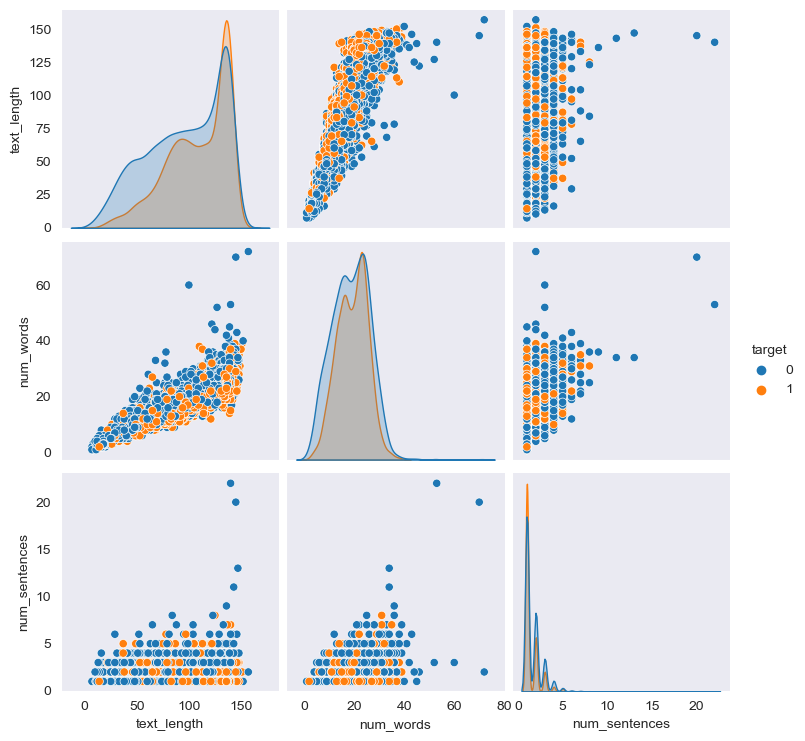

In [28]:
# check relationship between all columns
sns.pairplot(df_new,hue='target')
plt.show()

In [29]:
df_new.iloc[:,0:]

,text,target,text_length,num_words,num_sentences
0,Our Deeds are the Reason of this #earthquake M...,1,69,14,1
1,Forest fire near La Ronge Sask. Canada,1,38,8,2
2,All residents asked to 'shelter in place' are ...,1,133,24,2
3,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1
...,...,...,...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1,136,27,1
7605,on the flip side I'm at Walmart and there is a...,1,114,27,1
7606,Suicide bomber kills 15 in Saudi security site...,1,121,22,1
7608,Two giant cranes holding a bridge collapse int...,1,83,13,1


<Axes: >

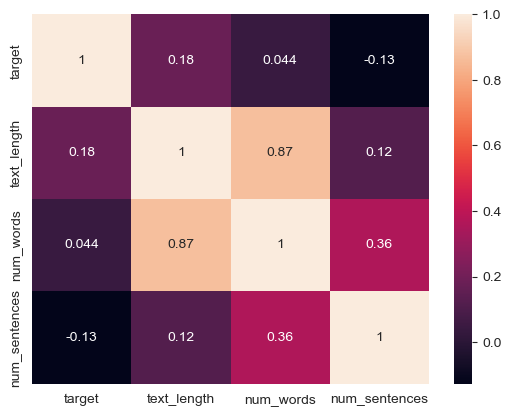

In [30]:
# check correlation of data
sns.heatmap(df_new.iloc[:,1:].corr(),annot=True)

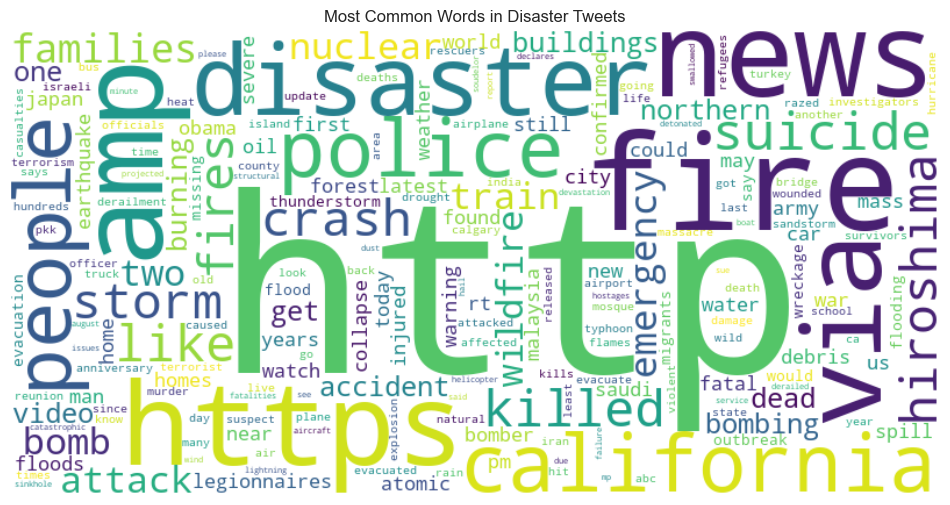


Top 20 most common words in disaster tweets:
http: 2356
fire: 172
news: 140
amp: 134
https: 131
via: 119
disaster: 114
california: 110
police: 106
people: 102
suicide: 99
killed: 93
like: 92
storm: 87
hiroshima: 86
crash: 85
fires: 83
families: 79
emergency: 74
train: 71


In [31]:
# Analyze the frequency of keywords and phrases associated with disaster tweets
def analyze_keywords(df):

    # Combine all disaster tweets
    disaster_tweets = df[df['target'] == 1]['text'].str.lower()
    
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    
    # Create a list of all words in disaster tweets
    all_words = []
    for tweet in disaster_tweets:
        tokens = word_tokenize(tweet)
        # Remove stopwords and non-alphabetic tokens
        words = [word for word in tokens if word.isalpha() and word not in stop_words]
        all_words.extend(words)
    
    # Get word frequencies
    word_freq = Counter(all_words)
    
    # Create and display word cloud
    plt.figure(figsize=(12, 8))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Words in Disaster Tweets')
    plt.show()
    
    # Display top 20 most common words
    print("\nTop 20 most common words in disaster tweets:")
    for word, freq in word_freq.most_common(20):
        print(f"{word}: {freq}")
analyze_keywords(df_new)

## Task: Data Preparation

In [32]:
# Clean text by removing special characters, URLs, and punctuation
def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user mentions (@username)
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#', '', text)
    
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text
df_new['cleaned_text'] = df_new['text'].apply(clean_text)

In [33]:
# Tokenize text and remove stopwords
def tokenize_text(text):
    # Get stopwords
    stop_words = set(stopwords.words('english'))
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords and non-alphabetic tokens
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    
    return tokens
# Join tokens back to text
df_new['processed_text'] = df_new['cleaned_text'].apply(tokenize_text)
df_new['processed_text'] = df_new['processed_text'].apply(lambda x: ' '.join(x))    

In [34]:
df_new

,text,target,text_length,num_words,num_sentences,cleaned_text,processed_text
0,Our Deeds are the Reason of this #earthquake M...,1,69,14,1,our deeds are the reason of this earthquake ma...,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,38,8,2,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,133,24,2,all residents asked to shelter in place are be...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,65,9,1,13000 people receive wildfires evacuation orde...,people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1,just got sent this photo from ruby alaska as s...,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1,136,27,1,worldnews fallen powerlines on glink tram upda...,worldnews fallen powerlines glink tram update ...
7605,on the flip side I'm at Walmart and there is a...,1,114,27,1,on the flip side im at walmart and there is a ...,flip side im walmart bomb everyone evacuate st...
7606,Suicide bomber kills 15 in Saudi security site...,1,121,22,1,suicide bomber kills 15 in saudi security site...,suicide bomber kills saudi security site mosqu...
7608,Two giant cranes holding a bridge collapse int...,1,83,13,1,two giant cranes holding a bridge collapse int...,two giant cranes holding bridge collapse nearb...


In [35]:
# Convert target labels to numerical format
df_new['target'] = df_new['target'].astype(int)

In [36]:
# Make object for stemming
#ps = PorterStemmer()

In [37]:
# # Make function for data cleaning
# def transform_text(x):
#     # convert to lowercase and tokenize
#     text = str(x).lower()
#     text = word_tokenize(text)
    
#     # Remove non-alphabetic tokens
#     y = []
#     for i in text:
#         if i.isalpha():
#             y.append(i)
            
#     text = y[:]
#     y.clear()
    
#     # Remove stopwords and punctuations
#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)
            
#     text = y[:]
#     y.clear()
    
#     # Stemming of words
#     for i in text:
#         y.append(ps.stem(i))
        
#     return " ".join(y)

In [38]:
# clean data
# df_new['transformed_data'] = df_new['text'].apply(transform_text)

In [39]:
df_new.head()

,text,target,text_length,num_words,num_sentences,cleaned_text,processed_text
0,Our Deeds are the Reason of this #earthquake M...,1,69,14,1,our deeds are the reason of this earthquake ma...,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,38,8,2,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,133,24,2,all residents asked to shelter in place are be...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,65,9,1,13000 people receive wildfires evacuation orde...,people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1,just got sent this photo from ruby alaska as s...,got sent photo ruby alaska smoke wildfires pou...


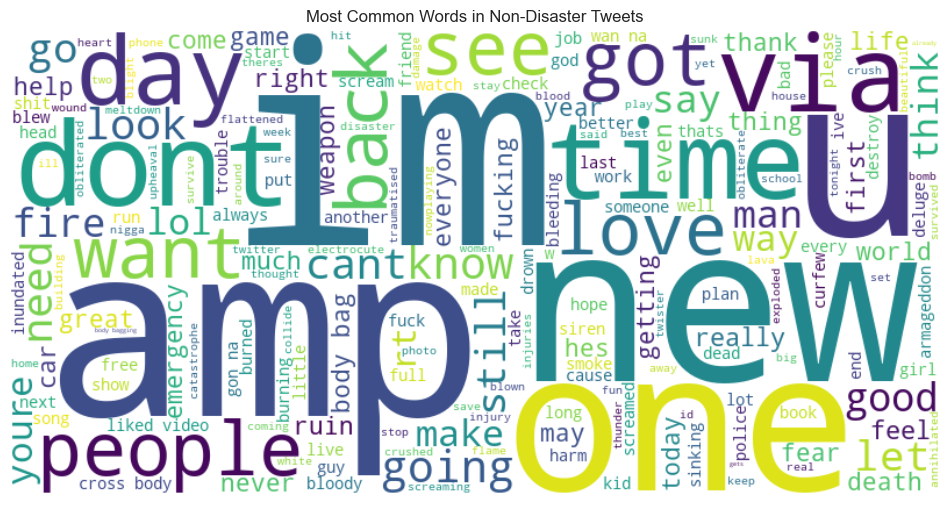

In [40]:
# Create and display word cloud for non disaster tweets
plt.figure(figsize=(12, 8))
wc = WordCloud(width=800, height=400, background_color='white')
plt.imshow(wc.generate(df_new[df_new['target'] == 0]['processed_text'].str.cat(sep=" ")),interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Non-Disaster Tweets')
plt.show()

In [41]:
#Convert text labels into numerical format (e.g., 0 for non-disaster, 1 for disaster).
df_new['target'].value_counts()

target
0    4315
1    3206
Name: count, dtype: int64

The labels are already in form of 0 and 1. So no need to do labeling

In [42]:
# Split the dataset into training and testing sets for model development andevaluation.

# Create feature matrix X and target vector y
X = df_new['processed_text']
y = df_new['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nDataset split statistics:")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True))


Dataset split statistics:
Training set size: 6016
Testing set size: 1505

Class distribution in training set:
target
0    0.573803
1    0.426197
Name: proportion, dtype: float64

Class distribution in test set:
target
0    0.573422
1    0.426578
Name: proportion, dtype: float64


In [43]:
# Save preprocessed data for future use
preprocessed_data ={
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}

# Part 2: Feature Engineering and Model Selection

## Task: Feature Engineering

In [44]:
# Extract basic numerical and categorical features from tweets
print("Extracting basic features...")

# Tweet length features
df_new['text_length'] = df_new['text'].str.len()
df_new['num_words'] = df_new['text'].str.split().str.len()
df_new['avg_word_length'] = df_new['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

# Special character features
df_new['hashtag_count'] = df_new['text'].str.count('#')
df_new['mention_count'] = df_new['text'].str.count('@')
df_new['url_count'] = df_new['text'].str.count('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
df_new['numeric_count'] = df_new['text'].apply(lambda x: len([word for word in str(x).split() if word.isdigit()]))

# Punctuation features
df_new['exclamation_count'] = df_new['text'].str.count('!')
df_new['question_count'] = df_new['text'].str.count('\?')
df_new['punctuation_count'] = df_new['text'].apply(lambda x: len([c for c in str(x) if c in '.,;!?']))

Extracting basic features...


In [45]:
df_new.head(2)

,text,target,text_length,num_words,num_sentences,cleaned_text,processed_text,avg_word_length,hashtag_count,mention_count,url_count,numeric_count,exclamation_count,question_count,punctuation_count
0,Our Deeds are the Reason of this #earthquake M...,1,69,13,1,our deeds are the reason of this earthquake ma...,deeds reason earthquake may allah forgive us,4.384615,1,0,0,0,0,0,0
1,Forest fire near La Ronge Sask. Canada,1,38,7,2,forest fire near la ronge sask canada,forest fire near la ronge sask canada,4.571429,0,0,0,0,0,0,1


In [46]:
# Extract sentiment-related features using VADER and TextBlob
print("Extracting sentiment features...")

# VADER sentiment
sia = SentimentIntensityAnalyzer()
df_new['vader_scores'] = df_new['cleaned_text'].apply(lambda x: sia.polarity_scores(x))
df_new['vader_negative'] = df_new['vader_scores'].apply(lambda x: x['neg'])
df_new['vader_neutral'] = df_new['vader_scores'].apply(lambda x: x['neu'])
df_new['vader_positive'] = df_new['vader_scores'].apply(lambda x: x['pos'])
df_new['vader_compound'] = df_new['vader_scores'].apply(lambda x: x['compound'])

# TextBlob sentiment
df_new['textblob_polarity'] = df_new['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_new['textblob_subjectivity'] = df_new['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Drop the intermediate vader_scores column
df_new = df_new.drop('vader_scores', axis=1)

Extracting sentiment features...


In [47]:
df_new.head(2)

,text,target,text_length,num_words,num_sentences,cleaned_text,processed_text,avg_word_length,hashtag_count,mention_count,...,numeric_count,exclamation_count,question_count,punctuation_count,vader_negative,vader_neutral,vader_positive,vader_compound,textblob_polarity,textblob_subjectivity
0,Our Deeds are the Reason of this #earthquake M...,1,69,13,1,our deeds are the reason of this earthquake ma...,deeds reason earthquake may allah forgive us,4.384615,1,0,...,0,0,0,0,0.000,0.851,0.149,0.2732,0.0,0.0
1,Forest fire near La Ronge Sask. Canada,1,38,7,2,forest fire near la ronge sask canada,forest fire near la ronge sask canada,4.571429,0,0,...,0,0,0,1,0.286,0.714,0.000,-0.3400,0.1,0.4


In [77]:
# Create TF-IDF features for text data
def create_tfidf_features(X, max_features=5000):
    print("Creating TF-IDF features...")
    
    # Initialize TF-IDF vectorizer
    tfidf = TfidfVectorizer(max_features=max_features, 
                           ngram_range=(1, 2),
                           stop_words='english')
    
    # Fit and transform data
    X_tfidf = tfidf.fit_transform(X)
  
    # Convert to DataFrames
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), 
                                   columns=tfidf.get_feature_names_out())
    
    return X_tfidf_df, tfidf
X_tfidf, tfidf_vectorizer = create_tfidf_features(X)

Creating TF-IDF features...


In [49]:
# Create word embeddings using pre-trained GloVe
def create_word_embeddings(texts, embedding_size=100):
    print("Loading GloVe embeddings...")
    
    # Load pre-trained GloVe embeddings
    glove = gensim_api.load('glove-twitter-100')
    
    def get_tweet_embedding(text):
        # Split text into words
        words = text.split()
        # Get embedding for each word
        word_embeddings = [glove[word] for word in words if word in glove]
        
        if not word_embeddings:
            return np.zeros(embedding_size)
        
        # Return average of word embeddings
        return np.mean(word_embeddings, axis=0)
    
    # Convert texts to embeddings
    embeddings = [get_tweet_embedding(text) for text in texts]
    
    # Convert to DataFrame
    embedding_df = pd.DataFrame(embeddings, 
                              columns=[f'embed_{i}' for i in range(embedding_size)])
    
    return embedding_df
X_embeddings = create_word_embeddings(X)

Loading GloVe embeddings...


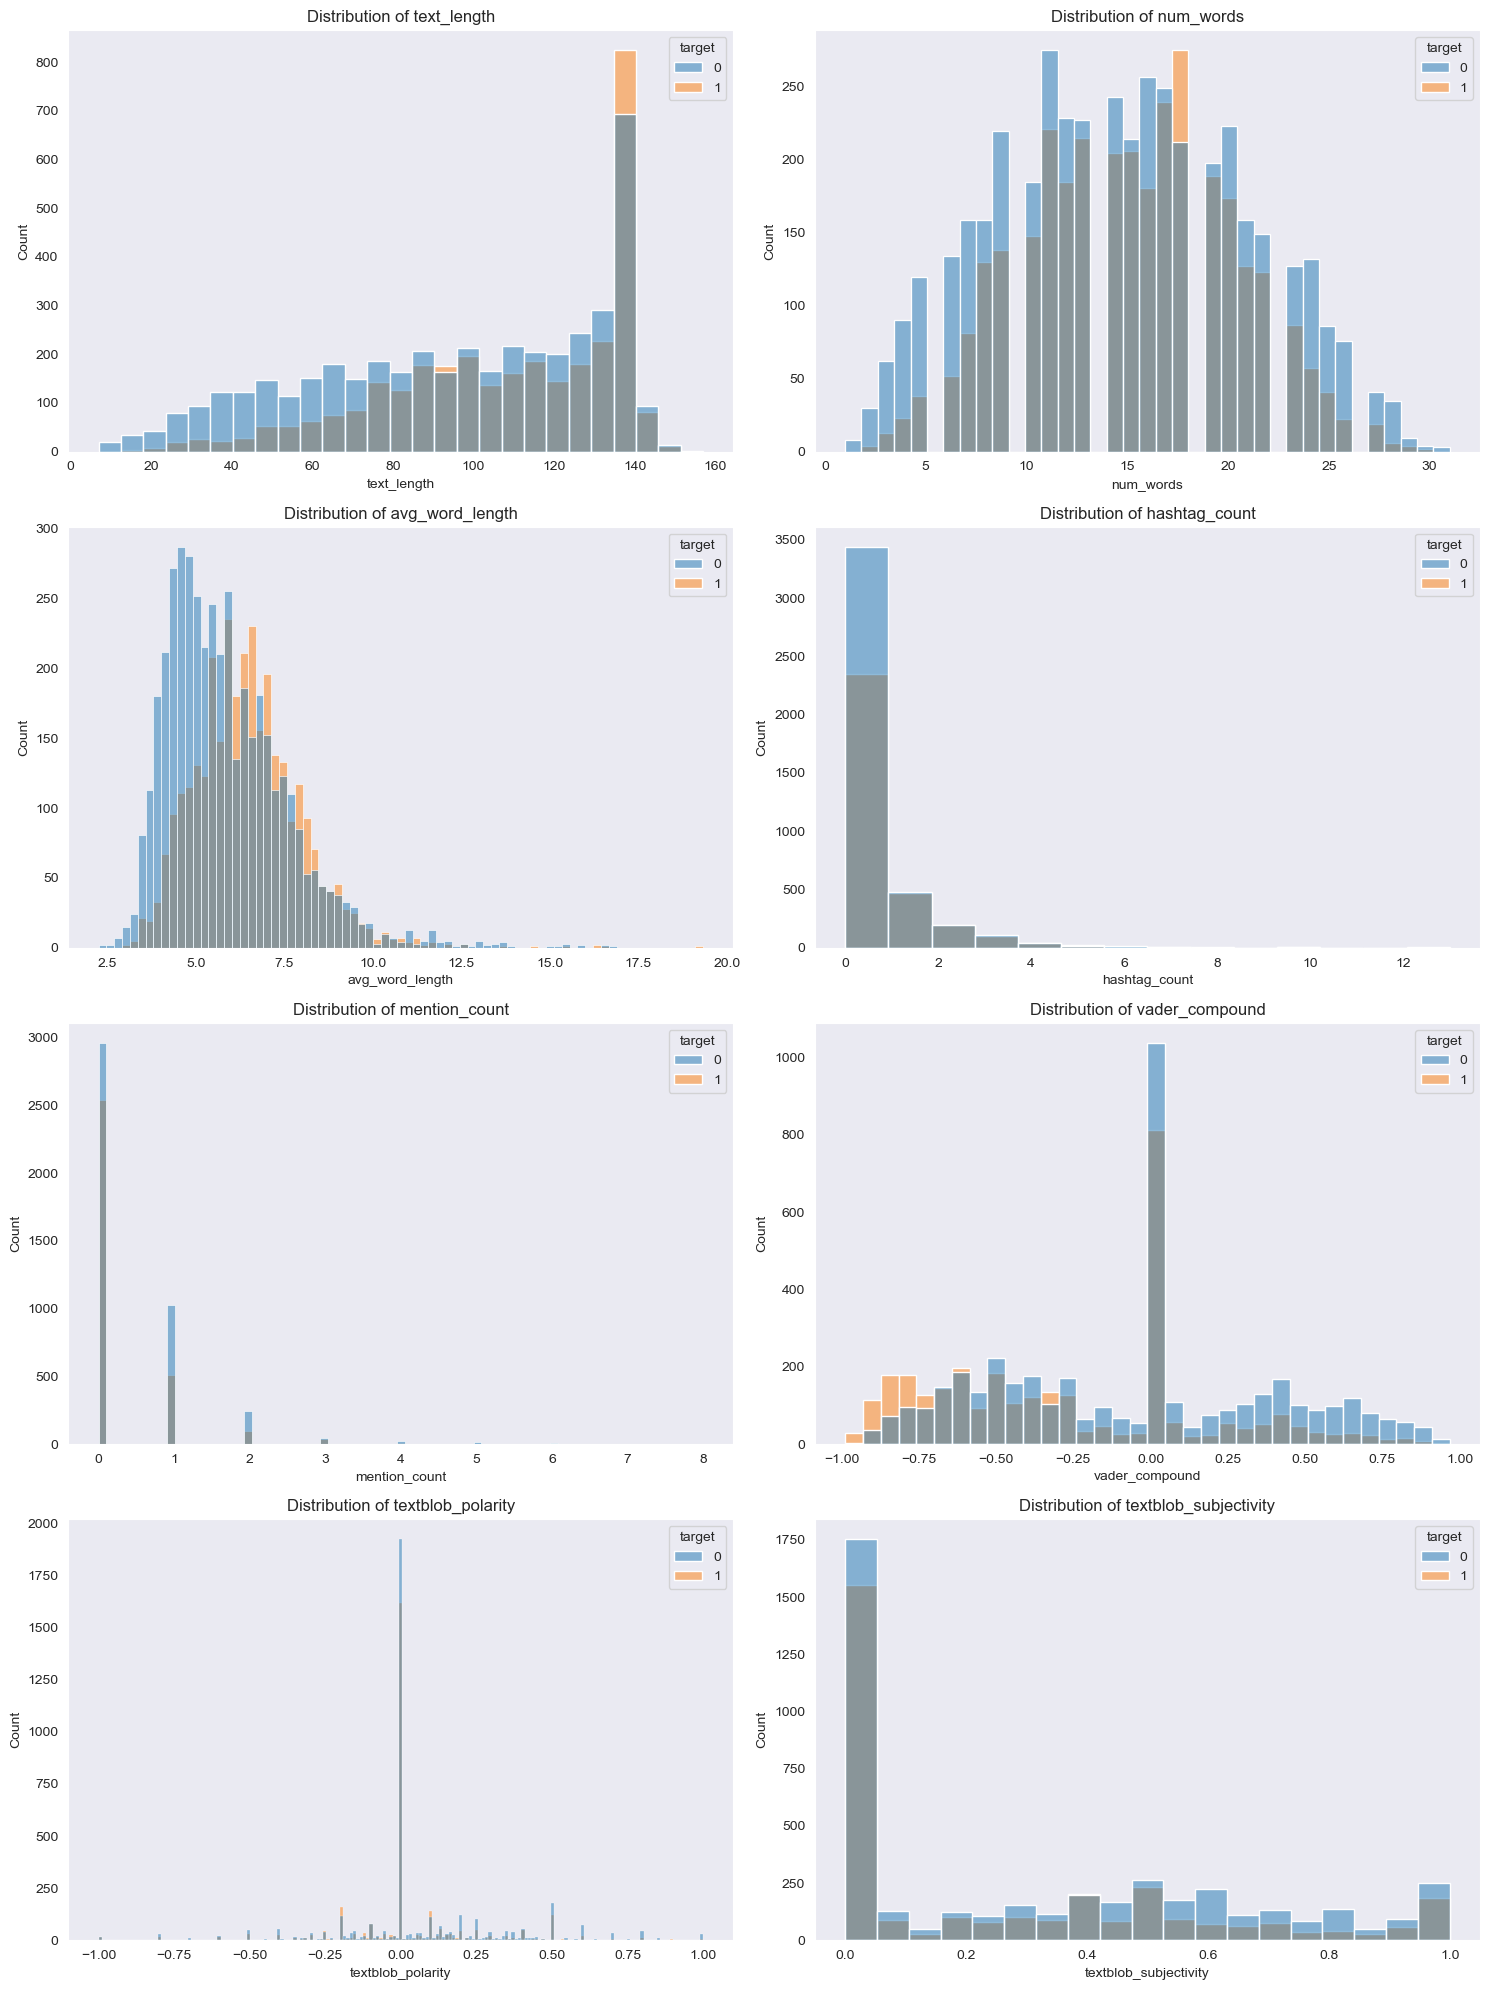

In [50]:
# Visualize distributions of engineered features

# Select numerical features for visualization
numeric_features = ['text_length', 'num_words', 'avg_word_length',
                   'hashtag_count', 'mention_count', 'vader_compound',
                   'textblob_polarity', 'textblob_subjectivity']

# Create subplot grid
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, feature in enumerate(numeric_features):
    sns.histplot(data=df_new, x=feature, hue='target', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

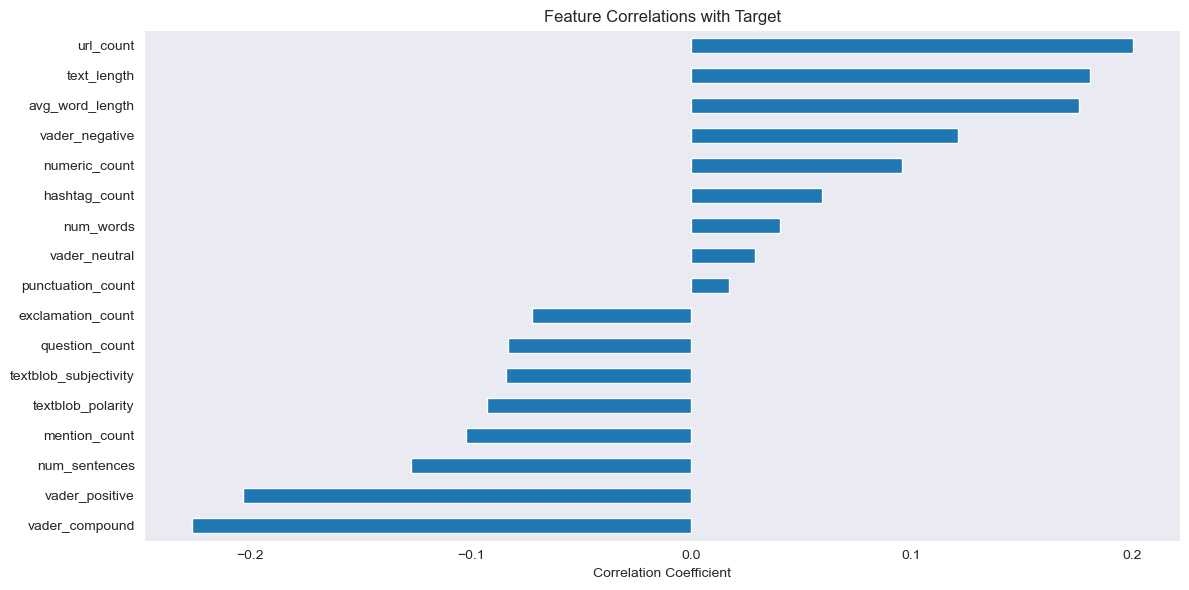

In [51]:
# Analyze correlation between features and target
# Select numerical features
numeric_cols = df_new.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop('target')

# Calculate correlations with target
correlations = df_new[numeric_cols].corrwith(df_new['target'])

# Plot correlation coefficients
plt.figure(figsize=(12, 6))
correlations.sort_values().plot(kind='barh')
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [52]:
# Combine all features into a single DataFrame
def combine_features(df, tfidf_features, embedding_features):
    # Select basic and sentiment features, confirming all are in df
    basic_features = [
        'text_length', 'num_words', 'avg_word_length',
        'hashtag_count', 'mention_count', 'url_count',
        'numeric_count', 'exclamation_count', 'question_count',
        'punctuation_count', 'vader_negative', 'vader_neutral',
        'vader_positive', 'vader_compound', 'textblob_polarity',
        'textblob_subjectivity'
    ]
    
    # Filter only the existing features in df to avoid NaN generation
    basic_features = [feature for feature in basic_features if feature in df.columns]
    
    # Reset indices of DataFrames before concatenation
    df = df[basic_features].reset_index(drop=True)
    tfidf_features = tfidf_features.reset_index(drop=True)
    embedding_features = embedding_features.reset_index(drop=True)
    
    # Combine features
    combined_features = pd.concat([df, tfidf_features, embedding_features], axis=1)
    
    # Verify no NaN values
    if combined_features.isna().sum().sum() > 0:
        print("Warning: NaN values detected in the combined DataFrame.")
    else:
        print("No NaN values in the combined DataFrame.")
    
    return combined_features
combined_features = combine_features(df_new, X_tfidf, X_embeddings)

No NaN values in the combined DataFrame.


In [53]:
combined_features.shape

(7521, 5116)

## Task: Model Selection and Training

### Task: Model Evaluation

In [54]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV, cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score,precision_recall_curve, recall_score, f1_score, make_scorer,confusion_matrix,roc_curve,roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [55]:
# split dataset for further use
x_train, x_test, Y_train, Y_test = train_test_split(combined_features, y, test_size=0.2, random_state=42)

In [56]:
# make objects of all models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
nnc = MLPClassifier(hidden_layer_sizes=64, alpha=0.01)
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgbc = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
classifiers = {
    'GaussianNB':gnb,
    'MultinomialNB':mnb,
    'BernoulliNB':bnb,
    'LogisticRegression':lrc,
    'RandomForestClassifier':rfc,
    'MLPClassifier':nnc,
    'SVC':svc,
    'KNeighborsClassifier':knc,
    'DecisionTreeClassifier':dtc,
    'AdaBoostClassifier':abc,
    'BaggingClassifier':bc,
    'ExtraTreesClassifier':etc,
    'GradientBoostingClassifier':gbc,
    'XGBClassifier':xgbc,
}

In [58]:
# Do scaling the data before training
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [59]:
# Make function for training and evaluation of performance
def train_classifier(clf,x_train,Y_train,x_test,Y_test):
    clf.fit(x_train,Y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)
    
    return accuracy, precision

In [60]:
# Lists to store accuracy and precision for each classifier
accuracy_scores = []
precision_scores = []

# Evaluate models
for name, clf in classifiers.items():
    # Pass each individual classifier to train_classifier
    current_accuracy, current_precision = train_classifier(clf, x_train_scaler, Y_train, x_test_scaler, Y_test)
    
    print('For', name)
    print('Accuracy:', current_accuracy)
    print('Precision:', current_precision)
    
    # Append current accuracy and precision to lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For GaussianNB
Accuracy: 0.7700996677740863
Precision: 0.7868217054263565
For MultinomialNB
Accuracy: 0.7966777408637874
Precision: 0.8574468085106383
For BernoulliNB
Accuracy: 0.8079734219269104
Precision: 0.8879120879120879
For LogisticRegression
Accuracy: 0.8006644518272426
Precision: 0.7898305084745763
For RandomForestClassifier
Accuracy: 0.8053156146179402
Precision: 0.8441814595660749
For MLPClassifier
Accuracy: 0.7255813953488373
Precision: 0.657496561210454
For SVC
Accuracy: 0.573421926910299
Precision: 0.0
For KNeighborsClassifier
Accuracy: 0.7574750830564784
Precision: 0.7618147448015122
For DecisionTreeClassifier
Accuracy: 0.7528239202657807
Precision: 0.7490774907749077
For AdaBoostClassifier
Accuracy: 0.7880398671096346
Precision: 0.7543307086614173
For BaggingClassifier
Accuracy: 0.813953488372093
Precision: 0.8339483394833949
For ExtraTreesClassifier
Accuracy: 0.8086378737541529
Precision: 0.8612244897959184
For GradientBoostingClassifier
Accuracy: 0.8033222591362126
Pre

In [61]:
# Define the cross-validation folds and scoring metrics
cv_folds = 5
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary')
}

In [62]:
# Hyperparameter grids for each model
param_grids = {
    'GaussianNB': {},
    'MultinomialNB': {'alpha': [0.1, 0.5, 1.0]},
    'BernoulliNB': {'alpha': [0.1, 0.5, 1.0]},
    'LogisticRegression': {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear']},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'max_features': ['auto', 'sqrt']},
    'MLPClassifier': {'hidden_layer_sizes': [(64,), (100,), (64, 64)], 'alpha': [0.0001, 0.001, 0.01]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']},
    'DecisionTreeClassifier': {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]},
    'AdaBoostClassifier': {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.5, 1.0]},
    'BaggingClassifier': {'n_estimators': [10, 50, 100], 'max_samples': [0.5, 1.0]},
    'ExtraTreesClassifier': {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]},
    'GradientBoostingClassifier': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 10]},
    'XGBClassifier': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 10]}
}

In [63]:
# Dictionary to store best models and their performance
best_models = {}
best_scores = {}

# Iterate over models and apply cross-validation and hyperparameter tuning
for name, clf in classifiers.items():
    print(f"Training and tuning {name}...")
    
    # Set up GridSearchCV or RandomizedSearchCV
    if param_grids[name]:  # Check if there are any hyperparameters to tune
        search = GridSearchCV(estimator=clf, param_grid=param_grids[name], scoring='accuracy', cv=cv_folds, n_jobs=-1)
    else:
        search = cross_val_score(clf, x_train_scaler, Y_train, cv=cv_folds, scoring='accuracy')
        best_score = np.mean(search)
        best_models[name] = clf.fit(x_train_scaler, Y_train)
        best_scores[name] = best_score
        continue

    # Fit search object to the data
    search.fit(x_train_scaler, Y_train)

    # Save the best model and its best score
    best_models[name] = search.best_estimator_
    best_scores[name] = search.best_score_

    print(f"Best Accuracy for {name}: {search.best_score_:.4f}")
    print(f"Best Parameters for {name}: {search.best_params_}\n")

# Display results
for model_name, score in best_scores.items():
    print(f"{model_name} - Best Cross-Validated Accuracy: {score:.4f}")

Training and tuning GaussianNB...
Training and tuning MultinomialNB...
Best Accuracy for MultinomialNB: 0.7899
Best Parameters for MultinomialNB: {'alpha': 0.5}

Training and tuning BernoulliNB...
Best Accuracy for BernoulliNB: 0.7955
Best Parameters for BernoulliNB: {'alpha': 0.5}

Training and tuning LogisticRegression...
Best Accuracy for LogisticRegression: 0.8095
Best Parameters for LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Training and tuning RandomForestClassifier...
Best Accuracy for RandomForestClassifier: 0.7985
Best Parameters for RandomForestClassifier: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}

Training and tuning MLPClassifier...
Best Accuracy for MLPClassifier: 0.7409
Best Parameters for MLPClassifier: {'alpha': 0.01, 'hidden_layer_sizes': (100,)}

Training and tuning SVC...
Best Accuracy for SVC: 0.8153
Best Parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Training and tuning KNeighborsClassifier...

In [64]:
for name, model in best_models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='binary')
    print(f"Model: {name}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}\n")

Model: GaussianNB
Test Accuracy: 0.7568
Test Precision: 0.8333

Model: MultinomialNB
Test Accuracy: 0.4505
Test Precision: 0.4369

Model: BernoulliNB
Test Accuracy: 0.6678
Test Precision: 0.9797

Model: LogisticRegression
Test Accuracy: 0.4266
Test Precision: 0.4266

Model: RandomForestClassifier
Test Accuracy: 0.5814
Test Precision: 0.9286

Model: MLPClassifier
Test Accuracy: 0.4266
Test Precision: 0.4266

Model: SVC
Test Accuracy: 0.4266
Test Precision: 0.4266

Model: KNeighborsClassifier
Test Accuracy: 0.5701
Test Precision: 0.2727

Model: DecisionTreeClassifier
Test Accuracy: 0.6219
Test Precision: 0.7212

Model: AdaBoostClassifier
Test Accuracy: 0.5807
Test Precision: 0.8235

Model: BaggingClassifier
Test Accuracy: 0.5741
Test Precision: 0.5040

Model: ExtraTreesClassifier
Test Accuracy: 0.5781
Test Precision: 1.0000

Model: GradientBoostingClassifier
Test Accuracy: 0.6066
Test Precision: 0.5613

Model: XGBClassifier
Test Accuracy: 0.5761
Test Precision: 0.7500



In [65]:
# Dictionary to store evaluation metrics for each model
evaluation_results = {}

for name, model in best_models.items():
    # Predict on test data
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    # Store metrics in dictionary
    evaluation_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

Model: GaussianNB
Accuracy: 0.7568
Precision: 0.8333
Recall: 0.5374
F1 Score: 0.6534

Model: MultinomialNB
Accuracy: 0.4505
Precision: 0.4369
Recall: 0.9969
F1 Score: 0.6075

Model: BernoulliNB
Accuracy: 0.6678
Precision: 0.9797
Recall: 0.2259
F1 Score: 0.3671

Model: LogisticRegression
Accuracy: 0.4266
Precision: 0.4266
Recall: 1.0000
F1 Score: 0.5980

Model: RandomForestClassifier
Accuracy: 0.5814
Precision: 0.9286
Recall: 0.0202
F1 Score: 0.0396

Model: MLPClassifier
Accuracy: 0.4266
Precision: 0.4266
Recall: 1.0000
F1 Score: 0.5980

Model: SVC
Accuracy: 0.4266
Precision: 0.4266
Recall: 1.0000
F1 Score: 0.5980

Model: KNeighborsClassifier
Accuracy: 0.5701
Precision: 0.2727
Recall: 0.0047
F1 Score: 0.0092

Model: DecisionTreeClassifier
Accuracy: 0.6219
Precision: 0.7212
Recall: 0.1854
F1 Score: 0.2949

Model: AdaBoostClassifier
Accuracy: 0.5807
Precision: 0.8235
Recall: 0.0218
F1 Score: 0.0425

Model: BaggingClassifier
Accuracy: 0.5741
Precision: 0.5040
Recall: 0.0981
F1 Score: 0.164

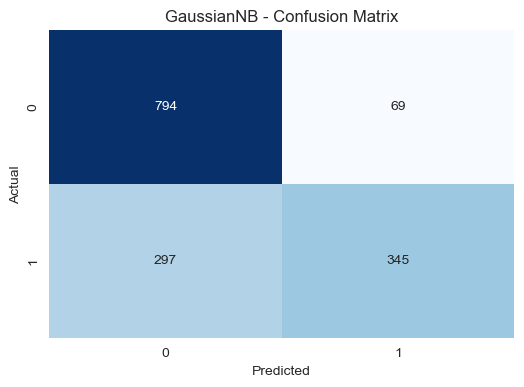

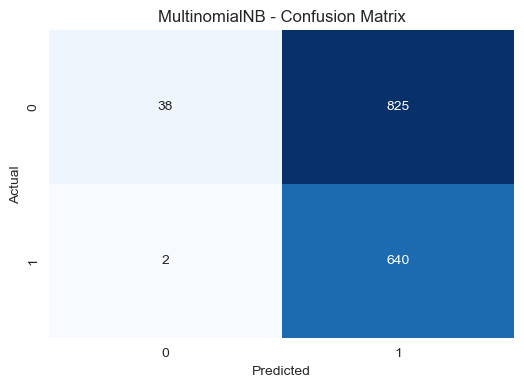

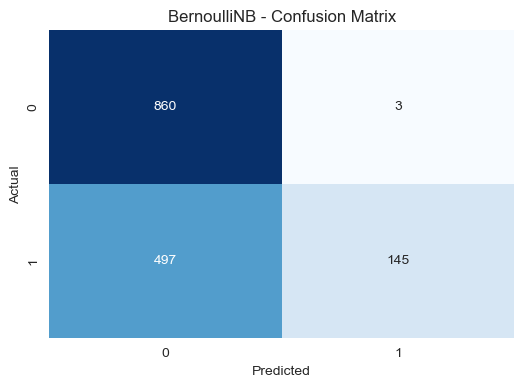

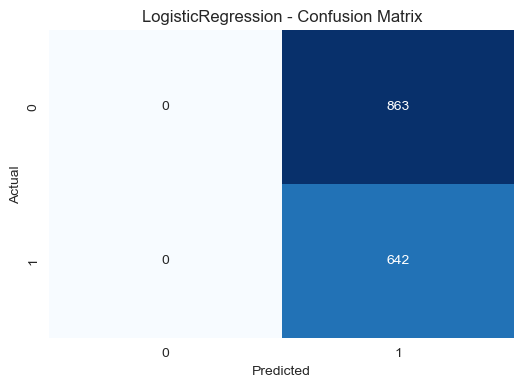

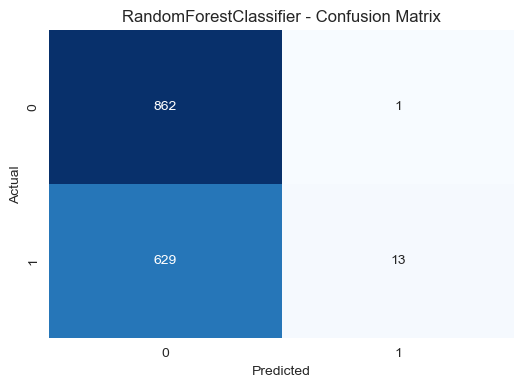

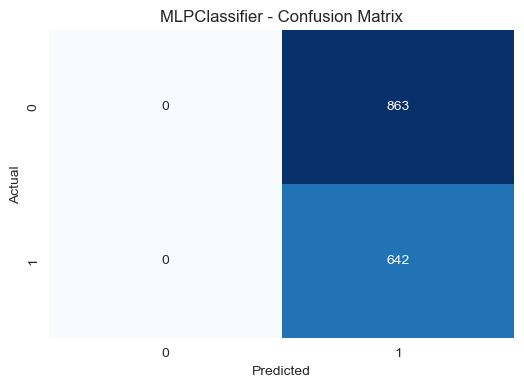

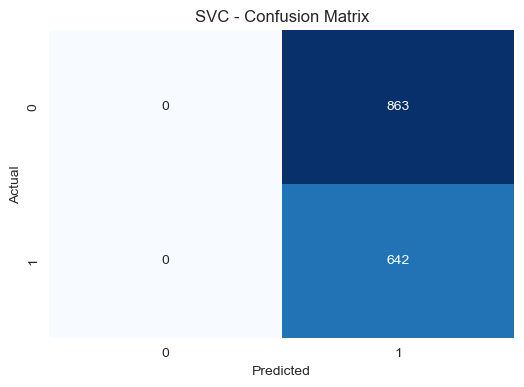

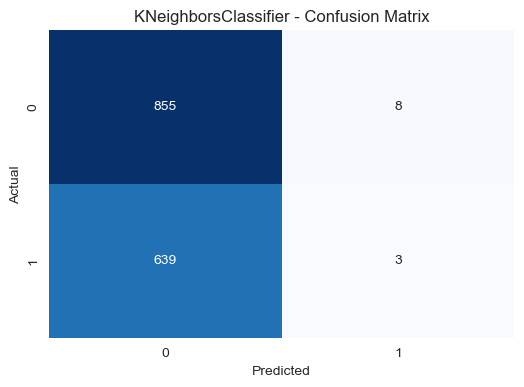

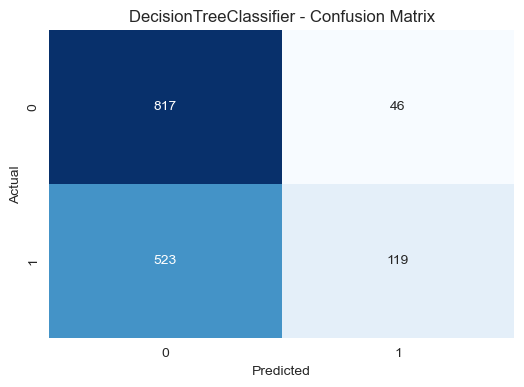

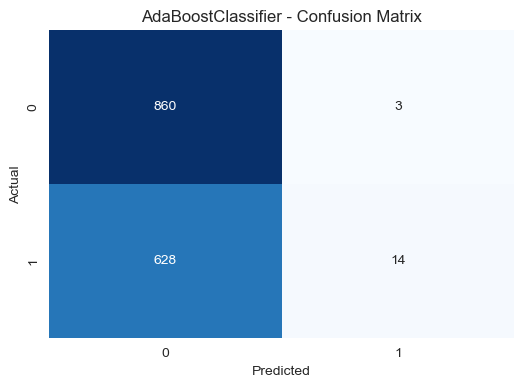

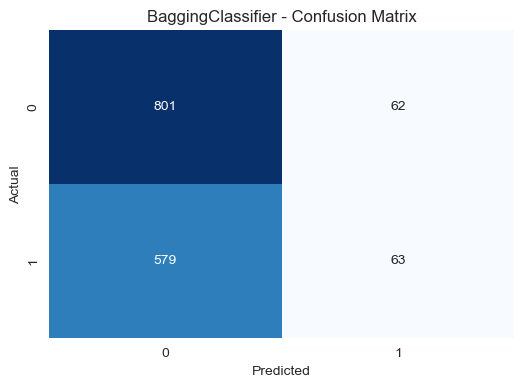

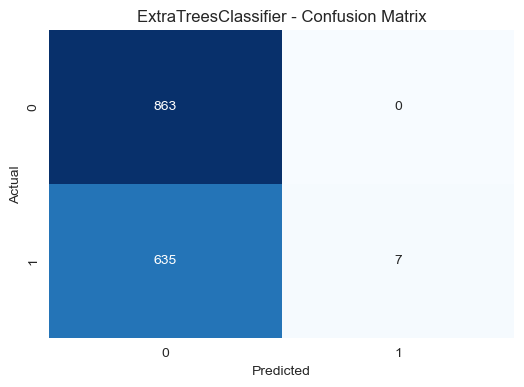

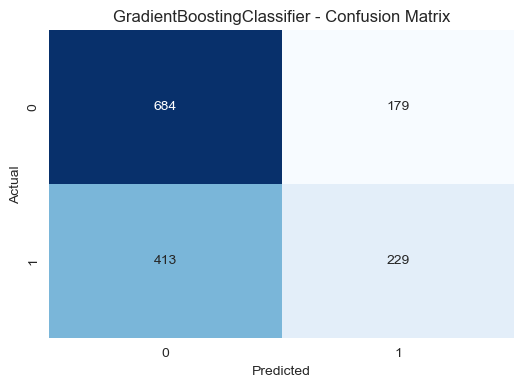

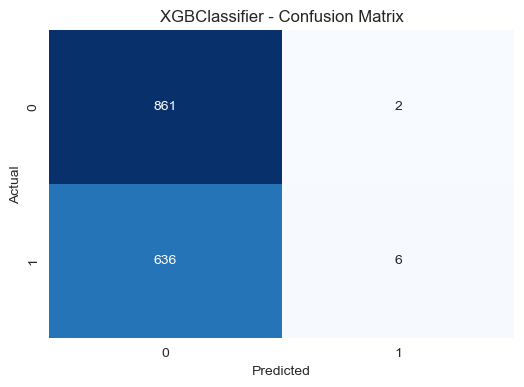

In [66]:
for name, metrics in evaluation_results.items():
    # Create confusion matrix
    cm = confusion_matrix(Y_test, metrics['y_pred'])

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

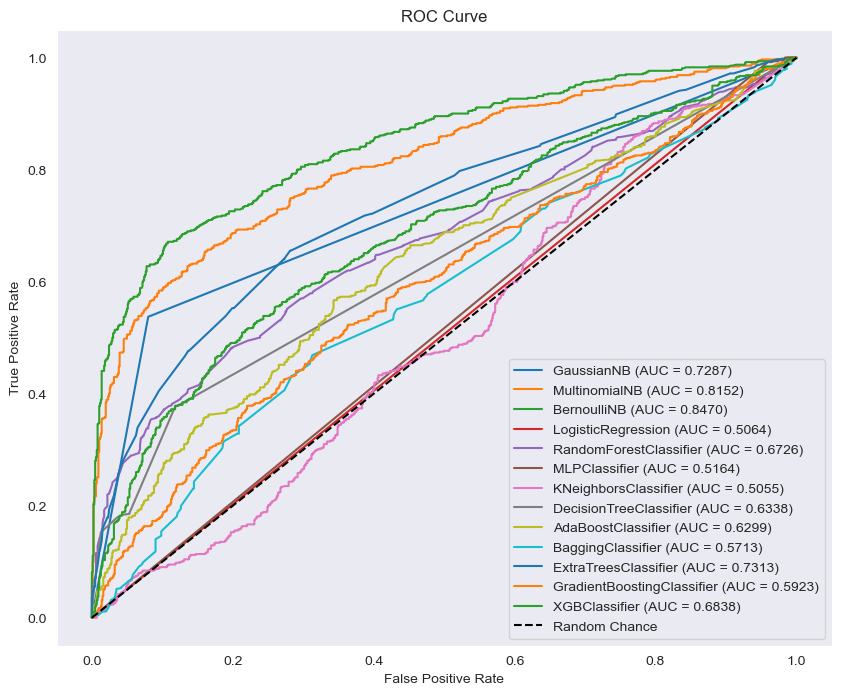

In [67]:
# ROC Curve
plt.figure(figsize=(10, 8))

for name, metrics in evaluation_results.items():
    if metrics['y_prob'] is not None:
        fpr, tpr, _ = roc_curve(Y_test, metrics['y_prob'])
        auc_score = roc_auc_score(Y_test, metrics['y_prob'])

        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

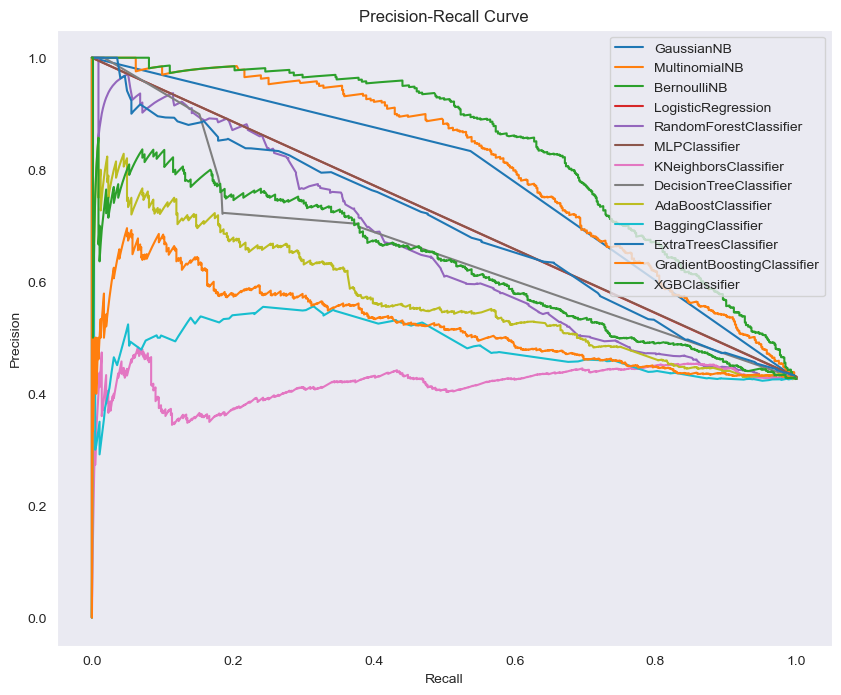

In [68]:
# Precision-Recall Curve
plt.figure(figsize=(10, 8))

for name, metrics in evaluation_results.items():
    if metrics['y_prob'] is not None:
        precision, recall, _ = precision_recall_curve(Y_test, metrics['y_prob'])

        plt.plot(recall, precision, label=f"{name}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()

In [69]:
# Comparison and Model Selection
import pandas as pd

# Collect model performance metrics
summary_df = pd.DataFrame({
    'Model': list(evaluation_results.keys()),
    'Accuracy': [metrics['accuracy'] for metrics in evaluation_results.values()],
    'Precision': [metrics['precision'] for metrics in evaluation_results.values()],
    'Recall': [metrics['recall'] for metrics in evaluation_results.values()],
    'F1 Score': [metrics['f1_score'] for metrics in evaluation_results.values()]
})

# Display sorted summary table
summary_df = summary_df.sort_values(by=['F1 Score', 'Accuracy'], ascending=False).reset_index(drop=True)
print("Model Performance Summary:")
print(summary_df)

# Select best model based on highest F1 Score
best_model_name = summary_df.loc[0, 'Model']
best_model = best_models[best_model_name]

print(f"\nBest Model for Deployment: {best_model_name}")

Model Performance Summary:
                         Model  Accuracy  Precision    Recall  F1 Score
0                   GaussianNB  0.756811   0.833333  0.537383  0.653409
1                MultinomialNB  0.450498   0.436860  0.996885  0.607499
2           LogisticRegression  0.426578   0.426578  1.000000  0.598044
3                MLPClassifier  0.426578   0.426578  1.000000  0.598044
4                          SVC  0.426578   0.426578  1.000000  0.598044
5   GradientBoostingClassifier  0.606645   0.561275  0.356698  0.436190
6                  BernoulliNB  0.667774   0.979730  0.225857  0.367089
7       DecisionTreeClassifier  0.621927   0.721212  0.185358  0.294919
8            BaggingClassifier  0.574086   0.504000  0.098131  0.164276
9           AdaBoostClassifier  0.580731   0.823529  0.021807  0.042489
10      RandomForestClassifier  0.581395   0.928571  0.020249  0.039634
11        ExtraTreesClassifier  0.578073   1.000000  0.010903  0.021572
12               XGBClassifier  0.576

### Task: Model Validation

In [70]:
# Final model
final_model = best_model

In [71]:
# Predict on test data
y_test_pred = final_model.predict(x_test)
y_test_prob = final_model.predict_proba(x_test)[:, 1] if hasattr(final_model, "predict_proba") else None

In [72]:
# Calculate performance metrics
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
test_f1 = f1_score(Y_test, y_test_pred)
print("\nModel Validation on Test Data:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


Model Validation on Test Data:
Test Accuracy: 0.7568
Test Precision: 0.8333
Test Recall: 0.5374
Test F1 Score: 0.6534


In [73]:
# Training set evaluation
y_train_pred = final_model.predict(x_train)
train_accuracy = accuracy_score(Y_train, y_train_pred)
train_precision = precision_score(Y_train, y_train_pred)
train_recall = recall_score(Y_train, y_train_pred)
train_f1 = f1_score(Y_train, y_train_pred)

print("\nModel Performance on Training Data:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

# Compare the differences
print("\nPerformance Comparison:")
print(f"Accuracy Difference: {train_accuracy - test_accuracy:.4f}")
print(f"Precision Difference: {train_precision - test_precision:.4f}")
print(f"Recall Difference: {train_recall - test_recall:.4f}")
print(f"F1 Score Difference: {train_f1 - test_f1:.4f}")


Model Performance on Training Data:
Training Accuracy: 0.8092
Training Precision: 1.0000
Training Recall: 0.5523
Training F1 Score: 0.7116

Performance Comparison:
Accuracy Difference: 0.0524
Precision Difference: 0.1667
Recall Difference: 0.0149
F1 Score Difference: 0.0581


I don't have unseen data to to test model with

## Part 4: Deployment with Web Interface

### Task: Model Deployment

In [78]:
# Save the model
import pickle
with open("gaussian_nb_model.pkl", "wb") as file:
    pickle.dump(model, file)

# Save TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(tfidf_vectorizer, file)

# Save Scaler
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Model, vectorizer, and scaler saved successfully!")

Model, vectorizer, and scaler saved successfully!
